In [1]:
import numpy as np
import matplotlib.pyplot as plt



Presynaptic Spike-Time Generation

In [ ]:
T = 1000
dt = 1
time = np.arange(0, T, dt)
N_neurons = 50
firing_rate = 10
spike_probability = firing_rate * dt / 1000.0

spike_trains = (np.random.rand(N_neurons, len(time)) < spike_probability).astype(int)

Calculating Spike Probabilities and Pattern Analysis

In [2]:
spike_counts = spike_trains.sum(axis=1)
spike_probabilities = spike_counts / len(time)
print("Average spike probability per neuron:", spike_probabilities)
population_activity = spike_trains.sum(axis=0)


Average spike probability per neuron: [0.011 0.01  0.006 0.01  0.009 0.01  0.006 0.017 0.013 0.011 0.011 0.014
 0.012 0.007 0.009 0.009 0.01  0.006 0.012 0.013 0.01  0.011 0.008 0.008
 0.014 0.013 0.014 0.011 0.008 0.013 0.008 0.007 0.011 0.005 0.007 0.006
 0.007 0.012 0.015 0.008 0.009 0.012 0.005 0.012 0.012 0.013 0.005 0.007
 0.01  0.013]


Visualizing Presynaptic Spike Activity

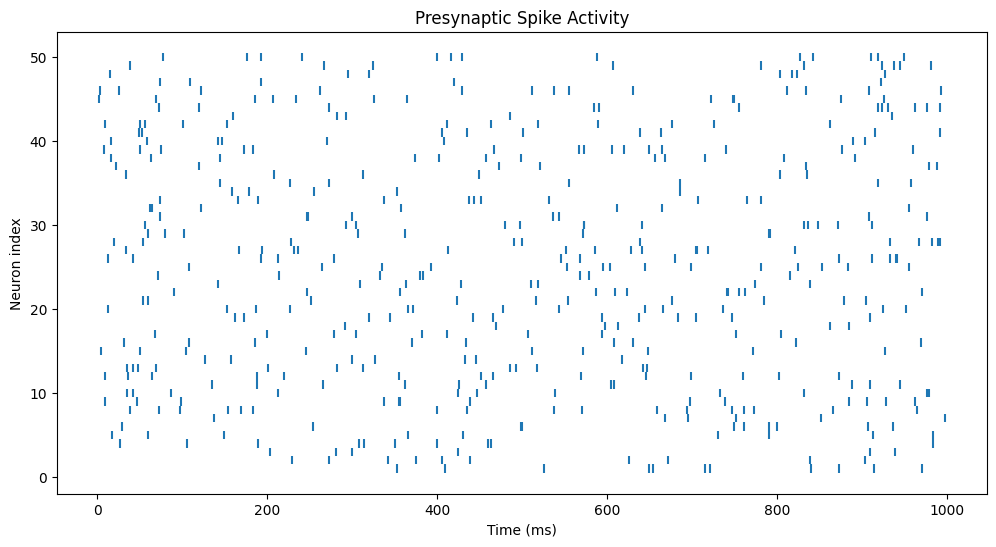

In [3]:
plt.figure(figsize=(12, 6))
for neuron in range(N_neurons):
    spike_times = time[spike_trains[neuron] == 1]
    plt.vlines(spike_times, neuron + 0.5, neuron + 1.5)
plt.xlabel("Time (ms)")
plt.ylabel("Neuron index")
plt.title("Presynaptic Spike Activity")
plt.show()


Postsynaptic Spike-Time Generation and Membrane Potential Dynamics

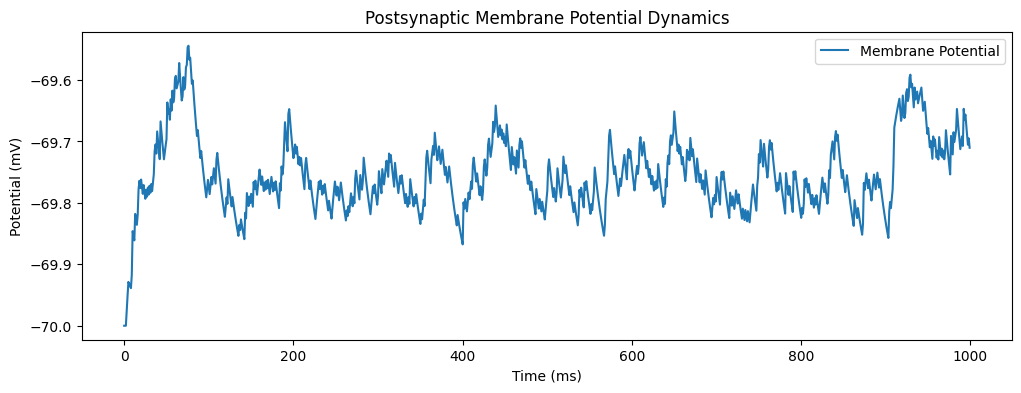

In [4]:
tau = 20
V_rest = -70
V_threshold = -50
V_reset = -70
syn_weight = 0.5

V = np.zeros(len(time))
V[0] = V_rest

input_current = syn_weight * population_activity
for t in range(1, len(time)):

    dV = (-(V[t-1] - V_rest) + input_current[t-1]) / tau * dt
    V[t] = V[t-1] + dV

    if V[t] >= V_threshold:
        V[t] = V_reset

plt.figure(figsize=(12, 4))
plt.plot(time, V, label='Membrane Potential')
plt.xlabel("Time (ms)")
plt.ylabel("Potential (mV)")
plt.title("Postsynaptic Membrane Potential Dynamics")
plt.legend()
plt.show()

#Conclusion
The simulation successfully demonstrated the stochastic nature of presynaptic spiking activity and its impact on postsynaptic potential dynamics. The generated presynaptic spike trains followed a probabilistic model, where each neuron's firing rate influenced its spike probability. The event plot confirmed that spikes were distributed randomly across neurons, exhibiting asynchronous firing behavior. The computed spike probabilities closely matched the expected values, with minor variations due to randomness. In the postsynaptic neuron, the membrane potential exhibited gradual fluctuations in response to incoming synaptic inputs. The leaky integrate-and-fire (LIF) model effectively captured the integration and decay of these inputs, showing that while the neuron received excitatory inputs, they were often insufficient to reach the spiking threshold, leading to a passive decay of potential. This highlights the importance of synaptic strength and input synchronization in determining neuronal firing. Overall, the experiment provided valuable insights into how neuronal circuits integrate synaptic inputs and how presynaptic activity influences postsynaptic responses.